# Basic landtype classification
#### Based on reflectance values in blue, green, red, and nir bands from Planet imagery.
Produced data will be used for selecting training data for CNN model

In [1]:
from data_tools import *
from refclass_tools import *

In [2]:
# show reflectance values for each landtype
# estimates are somewhat conservative
print("Reflectance values")
print("Snow:      ",snow_class)
print("Vegetation:",veg_class)
print("Rock/soil: ",rock_class)

Reflectance values
Snow:       {'blue': (0.4, 1), 'green': (0.4, 1), 'red': (0.4, 1), 'nir': (0.2, 0.8)}
Vegetation: {'blue': (0, 0.1), 'green': (0, 0.3), 'red': (0, 0.1), 'nir': (0, 0.3)}
Rock/soil:  {'blue': (0, 0.2), 'green': (0, 0.15), 'red': (0, 0.2), 'nir': (0.1, 0.6)}


\
<img src="spectral.gif">
(Artiola et al., 2004)

In [3]:
# read in reflectance data
img = np.load("/srv/shared/planetpieces/795543_1060719_2017-09-28_1021_BGRN_Analytic_refl.npy")
img = np.where(img==0, -9999, img) #change NaN values
img.shape

(4, 8000, 8000)

In [4]:
# reshape and take a subset of data that has all landcover types
img2 = reshape_vrts(img)
# subset data
subset = img2[4000:,0:4000,:]
subset.shape

(4000, 4000, 4)

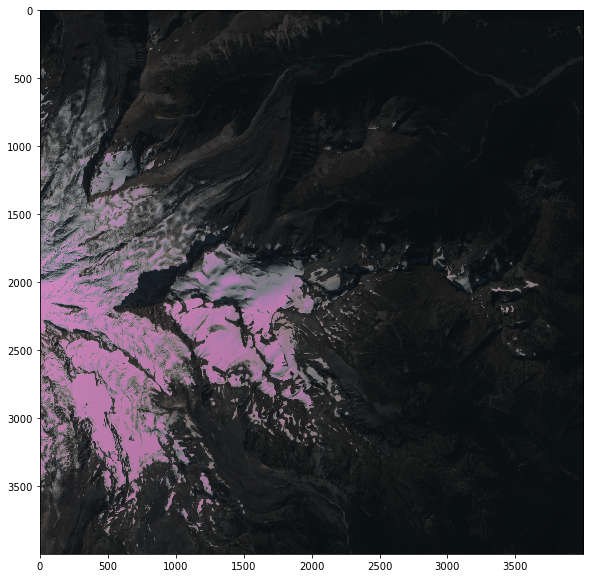

In [5]:
# create RGB color composite image
rgb_uint8 = (np.dstack((subset[:,:,2],subset[:,:,1],subset[:,:,0])) * 255.999).astype(np.uint8)

# view composite
plt.figure(figsize=(10,10))
plt.imshow(rgb_uint8)

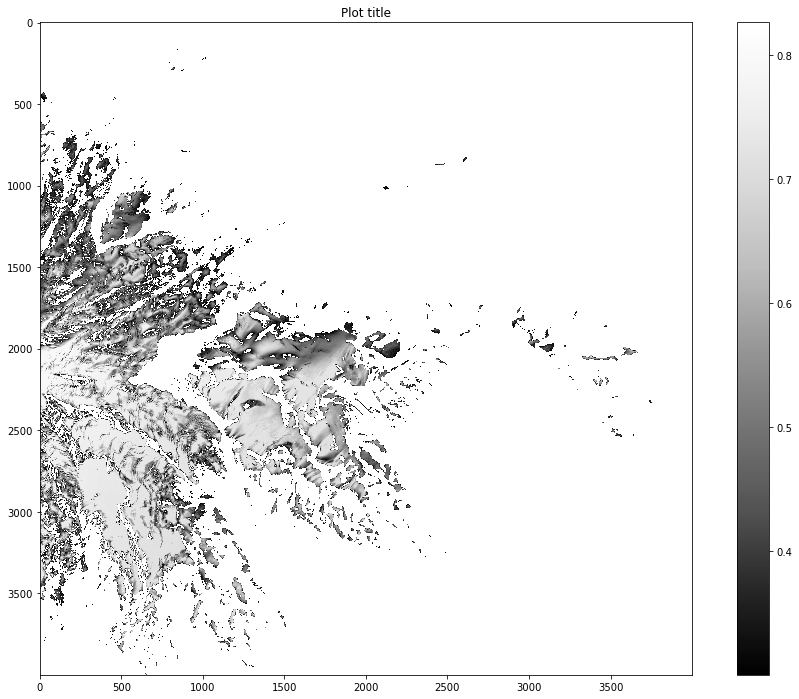

In [6]:
# quick basic mask of a single band to explore data (this example ~ snow)
band = 2
plot_spec(subset[:,:,band], mask_low=0.3,mask_high=1)

In [7]:
# using defined reflectance ranges...
snow_class

{'blue': (0.4, 1), 'green': (0.4, 1), 'red': (0.4, 1), 'nir': (0.2, 0.8)}

# Create classification

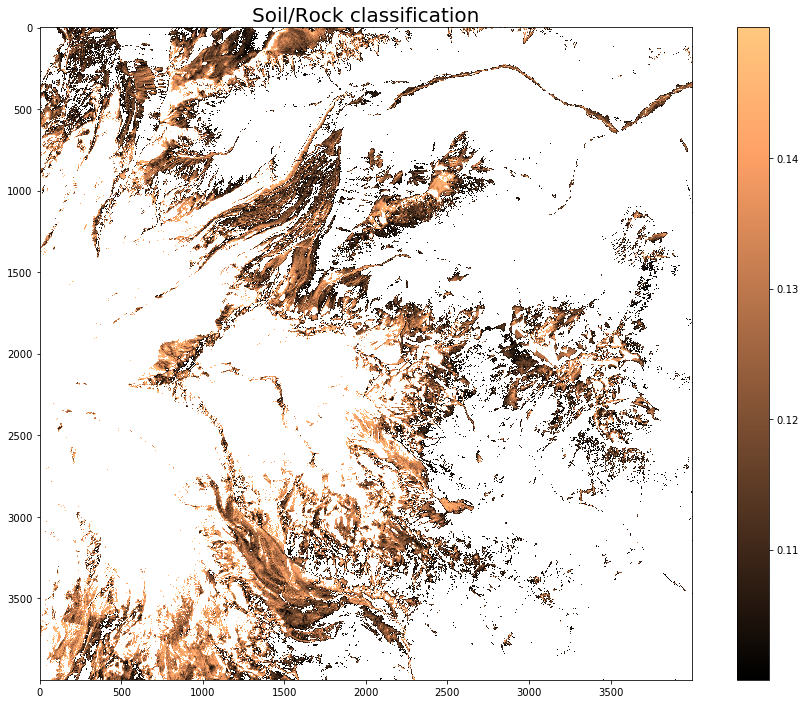

In [8]:
# Create classification of 3 landtypes based on reflectance of 4 bands
snowimg = spec_class(subset, snow_class)
vegimg = spec_class(subset, veg_class)
rockimg = spec_class(subset, rock_class)

# plot for snow
plot_me(rockimg,arr_title="Soil/Rock classification",cmap="copper")

# Band Plots

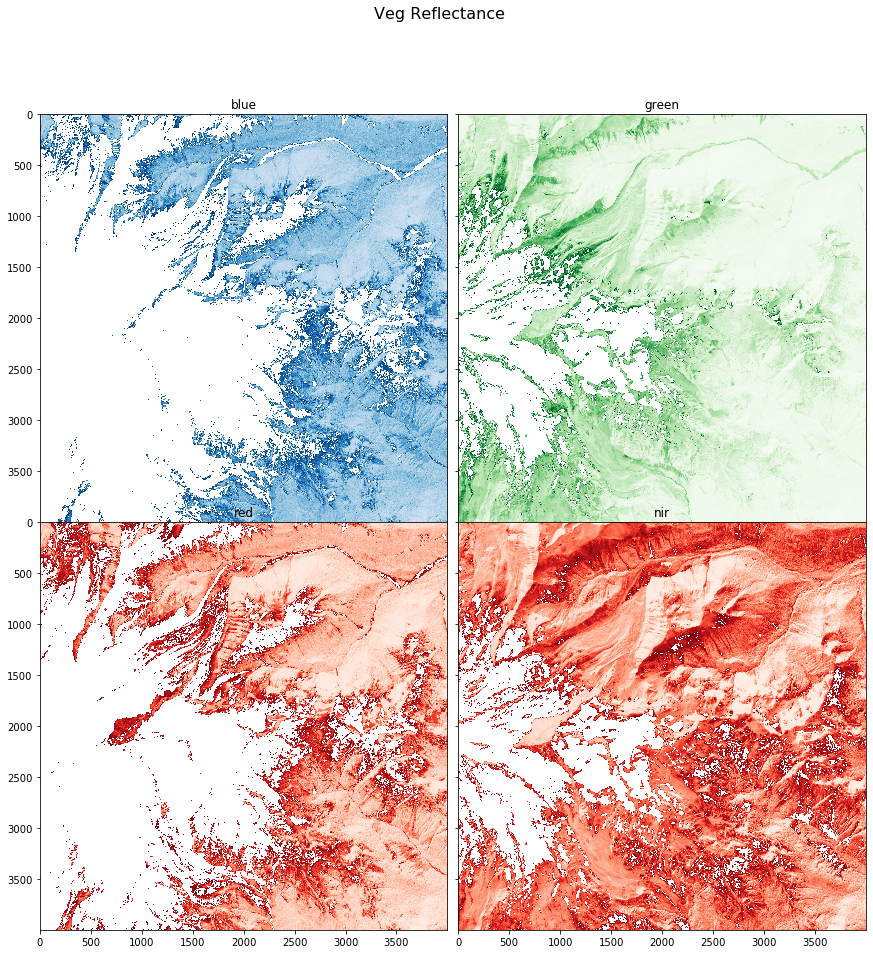

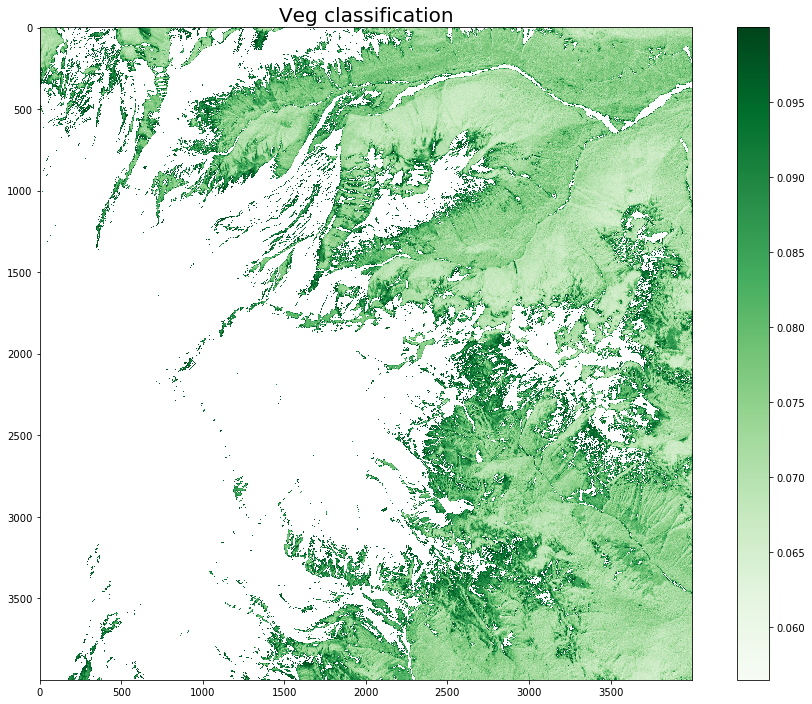

In [9]:
# plots showing reflectance values selected in each band 
# and final classification image

# # plot classification for snow
# plot_sub(subset,masks=snow_class, arr_title="Snow Reflectance")
# plot_me(snowimg,arr_title="Snow classification")

# plot classification for vegetation
plot_sub(subset,masks=veg_class, arr_title="Veg Reflectance")
plot_me(vegimg,arr_title="Veg classification",cmap="Greens")

# # plot classification for rock
# plot_sub(subset,masks=rock_class, arr_title="Soil/Rock Reflectance")
# plot_me(rockimg,arr_title="Soil/Rock classification",cmap="copper")

# Create landcover image

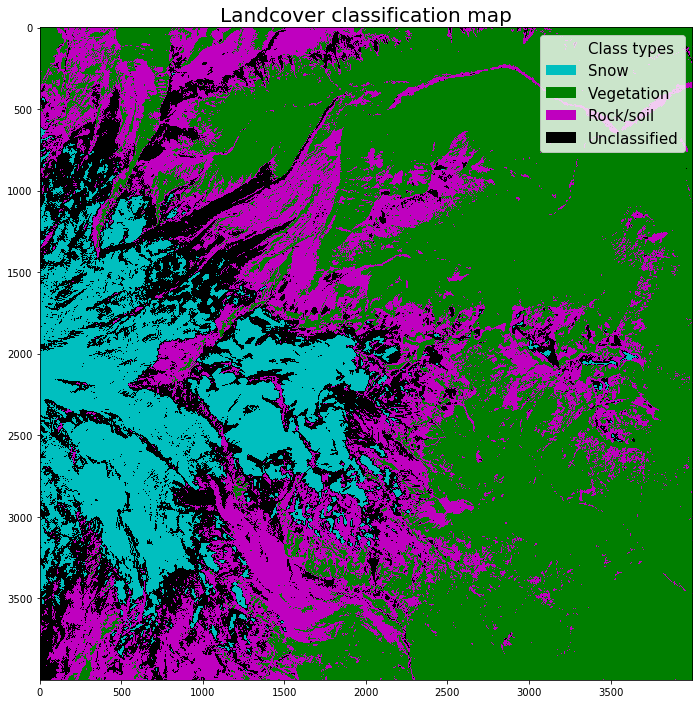

In [10]:
# create landcover composite
class_img = create_class(snowimg, vegimg, rockimg)

# plot results
plot_class(class_img)

In [1]:
## NOT RUN
# # Final workflow
# from refclass_tools import *

# # read in data
# spath = "/srv/shared/planetpieces/training/"
# path = "/home/jovyan/data/rainier"
# tif_fns = fn_list(path, "*Analytic_refl.tif")

# i=0
# for count, fn in enumerate(tif_fns):
#     print(count)
    
#     # read in file and reshape
#     img = read_raster(fn)
#     img = img/10000
#     img = np.where(img==0, -9999, img)
#     # img = np.ma.masked_where(0,img)
#     img = reshape_vrts(img)

#     # classify each landtype
#     snowimg = spec_class(img, snow_class)
#     vegimg = spec_class(img, veg_class)
#     rockimg = spec_class(img, rock_class)

#     # create composite
#     class_img = create_class(snowimg, vegimg, rockimg)
    
#     # rename
#     nam = str.split(str.split(fn,'rainier/')[1],'_refl')[0] + '_class.npy'
#     nam = spath + nam
    
#     # save as .npy (numpy arrays)
#     np.save(nam, class_img)

References:\
Artiola, J., Pepper, I. L., & Brusseau, M. L. (2004). Environmental monitoring and characterization. Elsevier.